Please perform the following exercises, each of which is worth $10$ points.  The instructions for most can be found at the end of the Chapter notes, however several include additional information / starter code which is provided below.  **Use the version of the chapter notes included in this homework folder to complete the exercises.**

 - **Chapter 9:** Exercises 3 and 6

# Starter code for Chapter 9  Exercise 3

In [6]:
# libraries
from autograd import numpy as np

# import the dataset
csvname = 'datasets/student_debt_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:1,:]
y = data[1:,:]

Note the shape of our input/output pairs here - each datapoint lies in a single column of `data`.

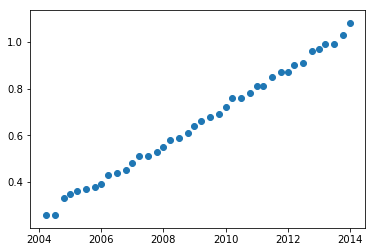

In [9]:
import matplotlib.pyplot as plt
figure = plt.figure()
plt.scatter(x,y)
plt.show()

# Starter code for Chapter 9 Exercise 6

Load in data - using `sklearn` import functionality.

In [10]:
# load in data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# strip off input / output pairs
x = mnist.data.T
y = mnist.target[np.newaxis,:]

In [11]:
print("input shape = " , x.shape)
print("output shape = ", y.shape)

input shape =  (784, 70000)
output shape =  (1, 70000)


Randomly sample input / output pairs.

In [12]:
# sample indices
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

An implementation of the multi-class Softmax cost is below.

In [2]:
# compute C linear combinations of input point, one per classifier
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# multiclass softmaax cost
def multiclass_softmax(w,x,y):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # return average
    return cost/float(np.size(y))

g = multiclass_softmax